In [1]:
from google.colab import files
uploaded = files.upload()

Saving otomoto_price_prediction_data.csv to otomoto_price_prediction_data (1).csv


In [2]:
import pandas as pd

df = pd.read_csv("otomoto_price_prediction_data.csv")

df.head()

,make,model,vehicle_year,mileage,engine_capacity,engine_power,gearbox,fuel_type,damaged,is_business,target_price
0,audi,a6,2013,153817.0,1984.0,180.0,automatic,petrol,0,0,69900.0
1,skoda,fabia,2004,115000.0,1390.0,75.0,manual,petrol,0,1,8299.0
2,chevrolet,camaro,2012,299000.0,3600.0,323.0,automatic,petrol,0,1,54500.0
3,bmw,seria-3,2013,155000.0,1995.0,163.0,automatic,diesel,0,0,62000.0
4,renault,talisman,2017,167000.0,1600.0,130.0,automatic,diesel,0,1,52999.0


In [3]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df.shape # checking number of rows and columns

(206207, 11)

In [5]:
df.describe() # summary of dataset

,vehicle_year,mileage,engine_capacity,engine_power,damaged,is_business,target_price
count,206207.000000,2.048530e+05,204029.000000,204628.000000,206207.000000,206207.000000,2.062070e+05
mean,2012.313855,6.656787e+05,1865.096922,151.300301,0.038059,0.600038,6.273519e+04
std,6.453940,2.040768e+08,708.559717,76.915073,0.191339,0.489891,8.604596e+04
min,1917.000000,1.000000e+00,400.000000,1.000000,0.000000,0.000000,6.000000e+02
25%,2008.000000,4.500000e+04,1461.000000,105.000000,0.000000,0.000000,1.799900e+04
50%,2013.000000,1.378500e+05,1797.000000,136.000000,0.000000,1.000000,3.590000e+04
75%,2017.000000,1.990000e+05,1997.000000,170.000000,0.000000,1.000000,7.490000e+04
max,2021.000000,9.060612e+10,8400.000000,1500.000000,1.000000,1.000000,5.250000e+06


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206207 entries, 0 to 206206
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   make             206207 non-null  object 
 1   model            206207 non-null  object 
 2   vehicle_year     206207 non-null  int64  
 3   mileage          204853 non-null  float64
 4   engine_capacity  204029 non-null  float64
 5   engine_power     204628 non-null  float64
 6   gearbox          204842 non-null  object 
 7   fuel_type        206207 non-null  object 
 8   damaged          206207 non-null  int64  
 9   is_business      206207 non-null  int64  
 10  target_price     206207 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 17.3+ MB


In [7]:
df.columns

Index(['make', 'model', 'vehicle_year', 'mileage', 'engine_capacity',
       'engine_power', 'gearbox', 'fuel_type', 'damaged', 'is_business',
       'target_price'],
      dtype='object')

In [8]:
# Checking Null values
df.isnull().sum()


make                  0
model                 0
vehicle_year          0
mileage            1354
engine_capacity    2178
engine_power       1579
gearbox            1365
fuel_type             0
damaged               0
is_business           0
target_price          0
dtype: int64

In [9]:
df.dropna(inplace=True) # drop NA values

In [10]:
df.isnull().sum()

make               0
model              0
vehicle_year       0
mileage            0
engine_capacity    0
engine_power       0
gearbox            0
fuel_type          0
damaged            0
is_business        0
target_price       0
dtype: int64

In [11]:
final_dataset=df[['make', 'model', 'vehicle_year', 'mileage', 'engine_capacity',
       'engine_power', 'gearbox', 'fuel_type', 'damaged', 'is_business',
       'target_price']]

In [12]:
final_dataset.head() # Final dataset

,make,model,vehicle_year,mileage,engine_capacity,engine_power,gearbox,fuel_type,damaged,is_business,target_price
0,audi,a6,2013,153817.0,1984.0,180.0,automatic,petrol,0,0,69900.0
1,skoda,fabia,2004,115000.0,1390.0,75.0,manual,petrol,0,1,8299.0
2,chevrolet,camaro,2012,299000.0,3600.0,323.0,automatic,petrol,0,1,54500.0
3,bmw,seria-3,2013,155000.0,1995.0,163.0,automatic,diesel,0,0,62000.0
4,renault,talisman,2017,167000.0,1600.0,130.0,automatic,diesel,0,1,52999.0


In [13]:
final_dataset['Current Year']=2021 # adding current year to see vehicles price comparison

In [14]:

final_dataset.head()

,make,model,vehicle_year,mileage,engine_capacity,engine_power,gearbox,fuel_type,damaged,is_business,target_price,Current Year
0,audi,a6,2013,153817.0,1984.0,180.0,automatic,petrol,0,0,69900.0,2021
1,skoda,fabia,2004,115000.0,1390.0,75.0,manual,petrol,0,1,8299.0,2021
2,chevrolet,camaro,2012,299000.0,3600.0,323.0,automatic,petrol,0,1,54500.0,2021
3,bmw,seria-3,2013,155000.0,1995.0,163.0,automatic,diesel,0,0,62000.0,2021
4,renault,talisman,2017,167000.0,1600.0,130.0,automatic,diesel,0,1,52999.0,2021


In [15]:
final_dataset['no_year']=final_dataset['Current Year']- final_dataset['vehicle_year']

In [16]:
final_dataset.head()

,make,model,vehicle_year,mileage,engine_capacity,engine_power,gearbox,fuel_type,damaged,is_business,target_price,Current Year,no_year
0,audi,a6,2013,153817.0,1984.0,180.0,automatic,petrol,0,0,69900.0,2021,8
1,skoda,fabia,2004,115000.0,1390.0,75.0,manual,petrol,0,1,8299.0,2021,17
2,chevrolet,camaro,2012,299000.0,3600.0,323.0,automatic,petrol,0,1,54500.0,2021,9
3,bmw,seria-3,2013,155000.0,1995.0,163.0,automatic,diesel,0,0,62000.0,2021,8
4,renault,talisman,2017,167000.0,1600.0,130.0,automatic,diesel,0,1,52999.0,2021,4


In [17]:
final_dataset.drop(['vehicle_year'],axis=1,inplace=True)

In [18]:
final_dataset.head()

,make,model,mileage,engine_capacity,engine_power,gearbox,fuel_type,damaged,is_business,target_price,Current Year,no_year
0,audi,a6,153817.0,1984.0,180.0,automatic,petrol,0,0,69900.0,2021,8
1,skoda,fabia,115000.0,1390.0,75.0,manual,petrol,0,1,8299.0,2021,17
2,chevrolet,camaro,299000.0,3600.0,323.0,automatic,petrol,0,1,54500.0,2021,9
3,bmw,seria-3,155000.0,1995.0,163.0,automatic,diesel,0,0,62000.0,2021,8
4,renault,talisman,167000.0,1600.0,130.0,automatic,diesel,0,1,52999.0,2021,4


In [19]:
final_dataset=final_dataset.drop(['Current Year'],axis=1)

final_dataset.head()

,make,model,mileage,engine_capacity,engine_power,gearbox,fuel_type,damaged,is_business,target_price,no_year
0,audi,a6,153817.0,1984.0,180.0,automatic,petrol,0,0,69900.0,8
1,skoda,fabia,115000.0,1390.0,75.0,manual,petrol,0,1,8299.0,17
2,chevrolet,camaro,299000.0,3600.0,323.0,automatic,petrol,0,1,54500.0,9
3,bmw,seria-3,155000.0,1995.0,163.0,automatic,diesel,0,0,62000.0,8
4,renault,talisman,167000.0,1600.0,130.0,automatic,diesel,0,1,52999.0,4


In [20]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()

final_dataset['make']= label_encoder.fit_transform(final_dataset['make']) 

final_dataset['model']= label_encoder.fit_transform(final_dataset['model']) 

final_dataset['gearbox']= label_encoder.fit_transform(final_dataset['gearbox']) 

final_dataset['fuel_type']= label_encoder.fit_transform(final_dataset['fuel_type']) 



In [21]:
final_dataset.head()

,make,model,mileage,engine_capacity,engine_power,gearbox,fuel_type,damaged,is_business,target_price,no_year
0,6,169,153817.0,1984.0,180.0,1,4,0,0,69900.0,8
1,83,452,115000.0,1390.0,75.0,7,4,0,1,8299.0,17
2,17,284,299000.0,3600.0,323.0,1,4,0,1,54500.0,9
3,11,902,155000.0,1995.0,163.0,1,0,0,0,62000.0,8
4,75,987,167000.0,1600.0,130.0,1,0,0,1,52999.0,4


In [22]:
# Define input values, or X by dropping the target values:
X = final_dataset.drop(['target_price'], axis = 1)

# Define output values - this is the target:
y = final_dataset['target_price']

In [23]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [24]:

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_Train, Y_Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:

Y_Pred = regressor.predict(X_Test)
Y_Pred

array([48702.74656644, 49346.1209923 , 95820.76798505, ...,
       35301.90952032, 49204.3136782 , 29681.71937036])

In [26]:

import statsmodels as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [27]:
model = smf.ols('y~X',final_dataset)
model

In [28]:

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                 2.684e+04
Date:                Wed, 02 Jun 2021   Prob (F-statistic):               0.00
Time:                        06:34:49   Log-Likelihood:            -2.4897e+06
No. Observations:              201971   AIC:                         4.979e+06
Df Residuals:                  201960   BIC:                         4.979e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5253.3383    693.931      7.570      0.0

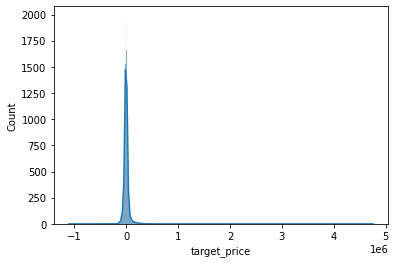

In [30]:
sns.histplot(Y_Test - Y_Pred,kde = True)

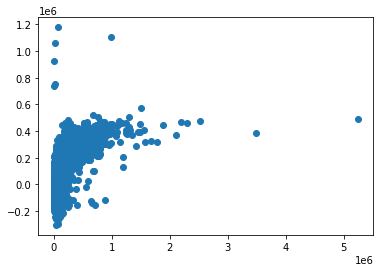

In [31]:
plt.scatter(Y_Test,Y_Pred)

In [32]:
# Calculating Errors

from sklearn.metrics import mean_squared_error,mean_absolute_error

print('MAE is:',mean_absolute_error(Y_Test,Y_Pred))
print('MSE is:',mean_squared_error(Y_Test,Y_Pred))
print('RMSE is:',np.sqrt(mean_squared_error(Y_Test,Y_Pred)))

MAE is: 28645.600983115317
MSE is: 3431477949.7821407
RMSE is: 58578.81826891134


In [34]:
df_corr = final_dataset.corr()
index = df_corr.index

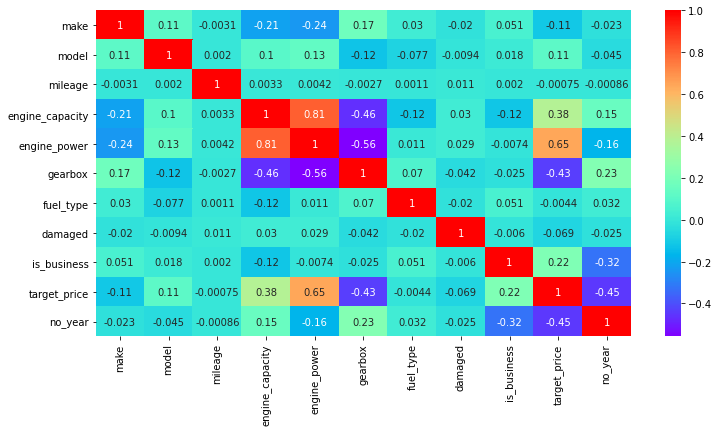

In [35]:
plt.figure(figsize = (12,6))
sns.heatmap(final_dataset[index].corr(),annot = True,cmap = 'rainbow')  # correlation of dataset uing Heatmap